# **Milestone 1**

## Bab 1 Perkenalan

Muhamad Bagus Septian - FTDS Batch 13

link heroku = https://m-bagus-septian-ftds-013-p0m1.herokuapp.com/

## Bab 2 Identifikasi Masalah

Tim sukses seorang politisi di California ingin mengadakan kampanye menggunakan Google Ads. Namun, mereka tidak tahu apakah kampanye ini akan berhasil atau tidak dan butuh budget seberapa besar per bulannya. Bantu mereka untuk mengetahui apakah kampanye di Google Ads ini efektif atau tidak.

### 2.1 Objective

Mengenalisis efektivitas kampanye di Google Ads.

### 2.2 Rumusan Masalah

1. Mencari tahu jenis iklan di Google Ads.
2. Mencari tahu jenis iklan yang menghasilkan output terbanyak.
3. Mencari tahu jenis iklan yang paling lama menghasilkan ouput
4. Mencari tahu jenis iklan yang paling murah.
5. Mencari tahu perbandingan pengeluaran dan output iklan.
6. Menggunakan analisis statistik deskriptif untuk melihat gambaran iklan di Google Ads.
7. Menggunakan analisis statistik inferential untuk mengetahui strategi iklan terbaik di Google Ads.
8. Menggunakan analisis confidence interval untuk mengetahui estimasi pengeluaran per bulan.



## Bab 3 Data Loading & Queries

### 3.1 Data Queries

Pada penelitian ini digunakan data yang diakses dari `bigquery_public_data` di Google Cloud Platform BigQuery. Data yang diambil dari `bigquery_public_data` adalah data pada tabel `creative_stats` yaitu kolom `advertiser_name`, `ad_type`, `num_of_days`, `impressions` dan tabel `advertiser_weekly_spend` yaitu kolom `spend_usd` dari dataset `google_political_ads`.Kriteria data yang diambil adalah tabel `creative_stats` pada  kolom `geo_targeting_included` harus mengikutsertakan California, `geo_targeting_excluded` tidak boleh mengikutsertakan California. Sementara itu pada tabel  `advertiser_geo_spend` kolom `country` harus `US` dan `country_subdivision_primary` harus `CA`. Terakhir tabel `advertiser_weekly_spend` kolom `spend_usd` tidak boleh 0. Syntax query yang digunakan untuk mengambil data adalah :

```
SELECT `bigquery-public-data.google_political_ads.creative_stats`.advertiser_name, ad_type, num_of_days,            
       `bigquery-public-data.google_political_ads.advertiser_weekly_spend`.spend_usd, impressions
FROM `bigquery-public-data.google_political_ads.creative_stats` 
JOIN `bigquery-public-data.google_political_ads.advertiser_geo_spend` ON
      `bigquery-public-data.google_political_ads.creative_stats`.advertiser_id=
      `bigquery-public-data.google_political_ads.advertiser_geo_spend`.advertiser_id
JOIN `bigquery-public-data.google_political_ads.advertiser_weekly_spend` ON
      `bigquery-public-data.google_political_ads.creative_stats`.advertiser_id=
      `bigquery-public-data.google_political_ads.advertiser_weekly_spend`.advertiser_id
WHERE geo_targeting_included LIKE "%California%" AND 
      geo_targeting_excluded NOT LIKE "%California%" AND
      country="US" AND
      country_subdivision_primary="CA" AND
      `bigquery-public-data.google_political_ads.advertiser_weekly_spend`.spend_usd>0;
```

Data yang telah diambil kemudian disimpan pada file csv dengan nama file `h8dsft_Milestone1_muhamad_bagus_septian.csv`

### 3.2 Data Loading

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [59]:
df = pd.read_csv("h8dsft_Milestone1_muhamad_bagus_septian.csv")

### 3.3 Data Overview

In [60]:
df.head()

,advertiser_name,ad_type,num_of_days,spend_usd,impressions
0,"DELTA DEFENSE, LLC",TEXT,7,100,0-1000
1,"DELTA DEFENSE, LLC",TEXT,7,100,0-1000
2,"DELTA DEFENSE, LLC",TEXT,7,100,0-1000
3,"DELTA DEFENSE, LLC",TEXT,7,100,0-1000
4,"DELTA DEFENSE, LLC",TEXT,7,100,0-1000


In [61]:
df.tail()

,advertiser_name,ad_type,num_of_days,spend_usd,impressions
333673,FUTURE FIRST LEADERSHIP PAC,TEXT,31,700,3000-4000
333674,FUTURE FIRST LEADERSHIP PAC,TEXT,31,300,3000-4000
333675,FUTURE FIRST LEADERSHIP PAC,TEXT,31,300,3000-4000
333676,FUTURE FIRST LEADERSHIP PAC,TEXT,31,500,3000-4000
333677,FUTURE FIRST LEADERSHIP PAC,TEXT,31,800,3000-4000


Judul Kolom | Definisi variabel
---|---
`advertiser_name` | Nama pengiklan yang memasang iklan di Google Ads
`ad_type` | Jenis iklan yang dipasang di Google Ads
`num_of_days` | Lama iklan tertampil di Google Ads dan mendapat impressions
`spend_usd` | Biaya yang dikeluarkan untuk memasang iklan di Google Ads setiap minggu
`impressions` | Seberapa banyak iklan di tampilkan di Google Ads

## Bab 4 Data Cleaning

Sebelum melakukan data cleaning perlu dibuat copy dataframe asli untuk memudahkan pengecekan dataframe nantinya

In [62]:
df_ads = df.copy()

Untuk selanjutnya data yang akan diolah adalah data pada dataframe `df_ads` dan dataframe `df` adalah data mentah yang akan digunakan untuk keperluan pengecekan data jika perlu

### 4.1 Adjusting Columns

In [63]:
df_ads["impressions"].unique()

array(['0-1000', '4000-5000', '1000-2000', '15000-20000', '30000-35000',
       '10000-15000', '5000-6000', '2000-3000', '3000-4000', '8000-9000',
       '125000-150000', '20000-25000', '60000-70000', '9000-10000',
       '25000-30000', '6000-7000', '900000-1000000', '2250000-2500000',
       '3500000-4000000', '3000000-3500000', '350000-400000',
       '50000-60000', '35000-40000', '450000-500000', '1500000-1750000',
       '300000-350000', '7000-8000', '225000-250000', '100000-125000',
       '500000-600000', '≥10000000', '150000-175000', '45000-50000',
       '70000-80000', '80000-90000', '250000-300000', '40000-45000',
       '600000-700000', '200000-225000', '90000-100000',
       '2000000-2250000', '175000-200000', '2500000-3000000',
       '1750000-2000000', '1250000-1500000', '4000000-4500000',
       '800000-900000', '5000000-6000000', '7000000-8000000',
       '400000-450000', '1000000-1250000', '700000-800000',
       '4500000-5000000', '9000000-10000000', '8000000-9000000']

Pada kolom `impressions` terdapat satu data dengan format yang berbeda yaitu '≥10000000'. Untuk keseragaman data maka peneliti akan mengubah data tersebut menjadi 10000000-20000000

In [64]:
df_ads["impressions"].replace(to_replace="≥10000000", value="10000000-20000000", inplace=True)

Diketahui data pada kolom `impressions` menrupakan sebuah kisaran angka. Oleh karena itu peneliti ingin mebuat kolom baru yang memuat rata-rata impression yang ada dan memberi nama kolom baru tersebut `average_impressions`

In [65]:
new = df_ads["impressions"].str.split("-", n=1, expand=True)

In [66]:
min = pd.to_numeric(new[0])
max = pd.to_numeric(new[1])

In [67]:
df_ads["average_impressions"] = (min+max)/2

Stelah membuat kolom baru peneliti akan mengubah nama kolom `impressions` menjadi `impressions_range`

In [68]:
df_ads.rename({"impressions" : "impressions_range"}, axis=1, inplace=True)

Selain itu karena diminta mencari tahu pengeluaran bulanan maka peneliti akan membuat kolom baru yang berisi pengeluaran bulanan dengan menggunakan data pada kolom `spend_usd`. Peneliti menggunakan asumsi bahwa setiap satu bulan terdiri dari empat minggu, sehingga kolom pengeluaran bulanan adalah hasil dari data pengeluaran mingguan pada kolom `spend_usd` dikali empat. Peneliti akan memberi nama kolom baru tersebut dengan nama `monthly_spend`

In [69]:
df_ads["monthly_spend"] = df_ads["spend_usd"]*4

Seteleh membuat kolom baru peneliti akan membuang kolom `spend_usd`karena informasi tersebut tidak digunakan untuk proses penelitian lebih lanjut.

In [70]:
df_ads.drop("spend_usd", axis=1, inplace=True)

In [71]:
df_ads.head()

,advertiser_name,ad_type,num_of_days,impressions_range,average_impressions,monthly_spend
0,"DELTA DEFENSE, LLC",TEXT,7,0-1000,500.0,400
1,"DELTA DEFENSE, LLC",TEXT,7,0-1000,500.0,400
2,"DELTA DEFENSE, LLC",TEXT,7,0-1000,500.0,400
3,"DELTA DEFENSE, LLC",TEXT,7,0-1000,500.0,400
4,"DELTA DEFENSE, LLC",TEXT,7,0-1000,500.0,400


Diketahui semua perubahan kolom berhasil, data siap diproses lebih lanjut

### 4.2 Handling Missing Values

In [72]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333678 entries, 0 to 333677
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   advertiser_name      333678 non-null  object 
 1   ad_type              333678 non-null  object 
 2   num_of_days          333678 non-null  int64  
 3   impressions_range    333678 non-null  object 
 4   average_impressions  333678 non-null  float64
 5   monthly_spend        333678 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 15.3+ MB


In [73]:
df_ads.isna().sum()

advertiser_name        0
ad_type                0
num_of_days            0
impressions_range      0
average_impressions    0
monthly_spend          0
dtype: int64

Diketahui tidak terdapat missing values pada dataframe `df_ads`

### 4.3 Handling Invalid Values

In [74]:
df_ads.describe()

,num_of_days,average_impressions,monthly_spend
count,333678.000000,3.336780e+05,3.336780e+05
mean,16.785764,1.732654e+05,5.104068e+05
std,40.776316,1.308869e+06,3.075516e+06
min,1.000000,5.000000e+02,4.000000e+02
25%,2.000000,5.000000e+02,4.000000e+02
50%,5.000000,5.000000e+02,2.400000e+03
75%,14.000000,6.500000e+03,4.920000e+04
max,532.000000,1.500000e+07,4.161640e+07


In [75]:
df_ads.to_csv("df_ads.csv", index=False)

Diketahui tidak terdapat data dengan nilai yang invalid.

## Bab 5 Analisis dan Perhitungan

### 5.1 Data Exploratory

1. Mencari tahu jenis iklan di Google Ads.

In [76]:
df_ads["ad_type"].value_counts()

VIDEO    222459
TEXT      83578
IMAGE     27641
Name: ad_type, dtype: int64

<AxesSubplot:xlabel='ad_type'>

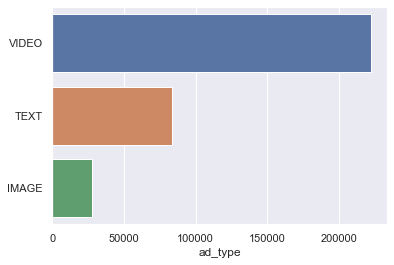

In [77]:
sns.barplot(x=df_ads["ad_type"].value_counts(), y=df_ads["ad_type"].value_counts().index, orient="h")

Diketaui terdapat tiga jenis iklan yang dipasang di Google Ads yaitu **text**, **image** dan **video**. Dari ketiga jenis iklan tersebut yang paling sering dipasang adalah jenis iklan **video**

2. Mencari tahu jenis iklan apa yang menghasilkan impressions terbanyak

In [78]:
df_ads.groupby("ad_type")[["average_impressions"]].mean()

,average_impressions
ad_type,
IMAGE,1.353905e+06
TEXT,5.488575e+04
VIDEO,7.104372e+04


<AxesSubplot:xlabel='average_impressions', ylabel='ad_type'>

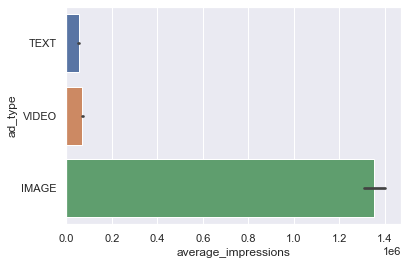

In [79]:
sns.barplot(data=df_ads, x="average_impressions", y="ad_type", orient="h")

Diketaui jenis iklan dengan rata-rata impression paling banyak adalah iklan dengan jenis **image**.

3. Mencari tahu jenis iklan yang paling lama mendapatkan impressions

In [48]:
df_ads.groupby(by="ad_type")[["ad_type","num_of_days"]].mean()

,num_of_days
ad_type,
IMAGE,35.937810
TEXT,21.209768
VIDEO,12.743980


<AxesSubplot:xlabel='num_of_days', ylabel='ad_type'>

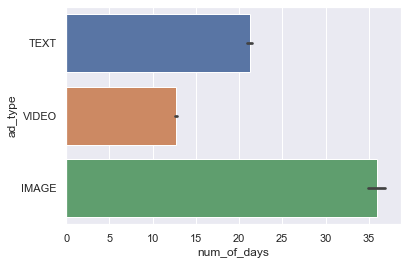

In [49]:
sns.barplot(data=df_ads, x="num_of_days", y="ad_type", orient="h")

Diketaui jenis iklan dengan rata-rata lama mendapatkan impressions terbanyak adalah iklan dengan jenis **image**.

4. Mencari tahu jenis iklan apa yang paling murah

In [29]:
df_ads.groupby(by="ad_type")[["ad_type","monthly_spend"]].mean().sort_values(by="monthly_spend")

,monthly_spend
ad_type,
IMAGE,4.680726e+04
VIDEO,5.363083e+04
TEXT,1.879526e+06


<AxesSubplot:xlabel='monthly_spend', ylabel='ad_type'>

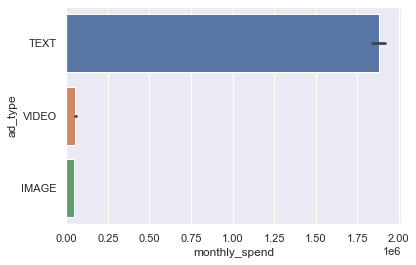

In [50]:
sns.barplot(data=df_ads, x="monthly_spend", y="ad_type", orient="h")

Diketaui jenis iklan dengan biaya rata-rata paling murah adalah iklan dengan jenis **image**.

4. Mencari tahu bagaimana perbandingan pengeluaran dan impressions

<AxesSubplot:xlabel='average_impressions', ylabel='num_of_days'>

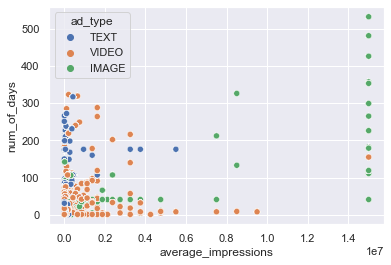

In [31]:
sns.scatterplot(data=df_ads, x='average_impressions',y='num_of_days', hue='ad_type')

Diketahui terdapat dua jenis iklan yang mendapatkan impression terbanyak adalah iklan jenis **video** dan **image**. Namun terdapat iklan dengan jenis **image** yang memerlukan biaya lebih murah dari pada iklan dengan jenis **video**.

### 5.2 Data Analysis

1. Menggunakan analisis statistik deskriptif untuk melihat gambaran iklan di Google Ads.

In [32]:
num_columns = df_ads.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_ads.select_dtypes(include=['object']).columns.tolist()

data_mean = df_ads[num_columns].mean().rename('mean')
data_median = df_ads[num_columns].median().rename('median')
data_mode = df_ads[num_columns + cat_columns].mode().iloc[0].rename('mode')

central_tendency = pd.concat([data_mean, data_median, data_mode], axis=1)
central_tendency

,mean,median,mode
num_of_days,16.785764,5.0,1
average_impressions,173265.372605,500.0,500.0
monthly_spend,510406.814953,2400.0,400
advertiser_name,NaN,NaN,"TURNING POINT USA, NFP"
ad_type,NaN,NaN,VIDEO
impressions_range,NaN,NaN,0-1000


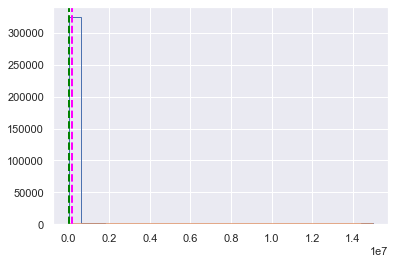

In [54]:
impress = df_ads['average_impressions']
density = stats.gaussian_kde(impress)
n, x, _ = plt.hist(impress, histtype='step', bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(impress.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(impress.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

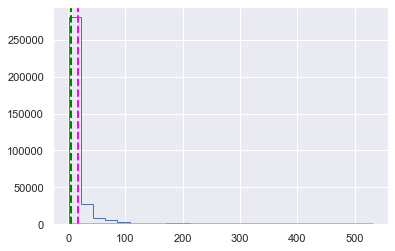

In [55]:
days = df_ads['num_of_days']
density = stats.gaussian_kde(impress)
n, x, _ = plt.hist(days, histtype='step', bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(days.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(days.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

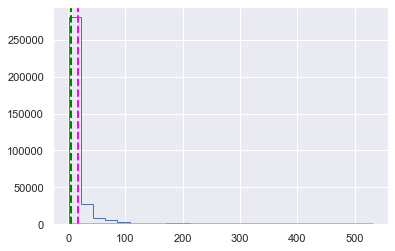

In [56]:
spend = df_ads['monthly_spend']
density = stats.gaussian_kde(impress)
n, x, _ = plt.hist(spend, histtype='step', bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(spend.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(spend.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Berdasarkan analisis central tendency diketahui :
- Rata-rata iklan di Google Ads mendapatkan impression selama 17 hari
- Nilai tengah iklan di Google Ads mendapatkan impression adalah 5 hari
- Lama iklan paling sering mendapatkan impression adalah selama 1 hari
- Rata-rata penegeluaran per bulan yang diperlukan untuk memasang iklan di Google Ads adalah $ 510406.8
- Nilai tengah pengeluaran per bulan yang diperlukan untuk memasang iklan di Google Ads adalah $ 2400.0
- Pengeluaran per bulan yang paling sering diperlukan untuk memasang iklan di Google Ads adalah $ 400.0
- Rata-rata impression yang didapat iklan yang di pasang di Google Ads adalah sebesar 173265 kali
- Nilai tengah jumlah impression yang didapat iklan yang di pasang di Google Ads adalah sebesar 500 kali
- Impression paling sering yang didapatkan iklan yang dipasang di Google Ads adalah sebesar 500 kali
- Pengiklan yang paling sering memasang iklan adalah TURNING POINT USA, NFP
- Jenis iklan yang paling sering dipasang di Google Ads adalah video
- Rentang impression yang paling sering didapat di Google Ads adalah 0-1000 kali

2. Menggunakan analisis statistik inferential untuk mengetahui strategi iklan terbaik di Google Ads.

Diketahui jenis iklan termurah adalah iklan jenis image dan alternatif termurah ke dua adalah iklan jenis video. Peneliti ingin melakukan hipotesis apakah terdapat perbedaan yang signifikan pada rata-rata pengeluaran dari kedua jenis iklan tersebut.

In [84]:
image = df_ads[df_ads["ad_type"]=="IMAGE"][["monthly_spend"]]
video = df_ads[df_ads["ad_type"]=="VIDEO"][["monthly_spend"]]

print(f"Rata-rata pengeluaran jenis iklan jenis image adalah $", np.round(image["monthly_spend"].mean()))
print(f"Rata-rata pengeluaran jenis iklan jenis video adalah $", np.round(video["monthly_spend"].mean()))

Rata-rata pengeluaran jenis iklan jenis image adalah $ 46807.0
Rata-rata pengeluaran jenis iklan jenis video adalah $ 53631.0


Berdasarkan temuan tersebut maka peneliti akan merumuskan hipotesis sebagai berikut :


**H0: μ_image = μ_video**

**H1: μ_image != μ_video**

In [87]:
t_stat, p_val = stats.ttest_ind(image["monthly_spend"],video["monthly_spend"])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.1753030215667348
t-statistics: -1.3553634219631299


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


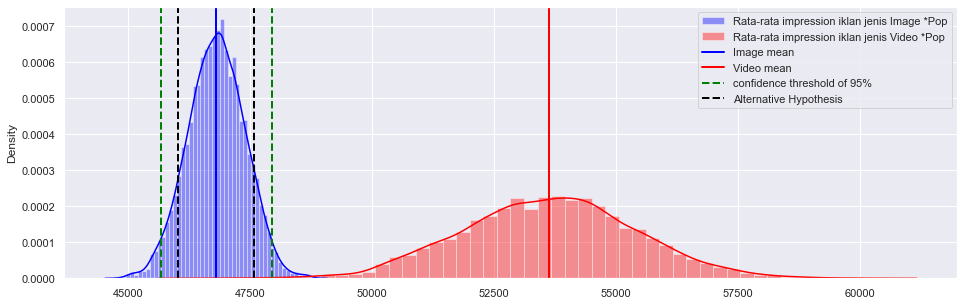

In [137]:
image_pop = np.random.normal(image["monthly_spend"].mean(), image["monthly_spend"].std()/np.sqrt(len(image)), 10000)
video_pop = np.random.normal(video["monthly_spend"].mean(), video["monthly_spend"].std()/np.sqrt(len(video)), 10000)

ci_t = stats.norm.interval(0.95, image["monthly_spend"].mean(), image["monthly_spend"].std()/np.sqrt(len(image)))
plt.figure(figsize=(16,5))
sns.distplot(image_pop, label='Rata-rata impression iklan jenis Image *Pop',color='blue')
sns.distplot(video_pop, label='Rata-rata impression iklan jenis Video *Pop',color='red')

plt.axvline(image["monthly_spend"].mean(), color='blue', linewidth=2, label='Image mean')
plt.axvline(video["monthly_spend"].mean(), color='red',  linewidth=2, label='Video mean')

plt.axvline(ci_t[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci_t[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(image["monthly_spend"].mean()+t_stat[0]*image["monthly_spend"].std()/np.sqrt(len(image)), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(image["monthly_spend"].mean()-t_stat[0]*image["monthly_spend"].std()/np.sqrt(len(image)), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan uji hipotesis testing diketahui nilai p > α, berati H0 gagal ditolak. Oleh karena itu dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan antara mean image dan mean video.

Karena secara hasil uji hipotesis tidak terdapat perbedaan yang signifikan maka peneliti mengusulkan untuk menggunakan iklan dengan jenis image

3. Mencari tahu estimasi biaya per bulan yang dibutuhkan dengan strategi yang dipilih

Peneliti akan menggunakan analisis confidence interval untuk mengetahui estimasi biaya yang akan dikeluarkan untuk memasang iklan jenis image

In [138]:
z = stats.norm.ppf(0.975)
margin_error = z*image["monthly_spend"].std()/np.sqrt(len(image))

ci_lower = image["monthly_spend"].mean() - margin_error
ci_upper = image["monthly_spend"].mean() + margin_error

print(f"Batas bawah confidence interval adalah {np.round(ci_lower)}")
print(f"Batas atas confidence interval adalah {np.round(ci_upper)}")

Batas bawah confidence interval adalah 45671.0
Batas atas confidence interval adalah 47943.0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


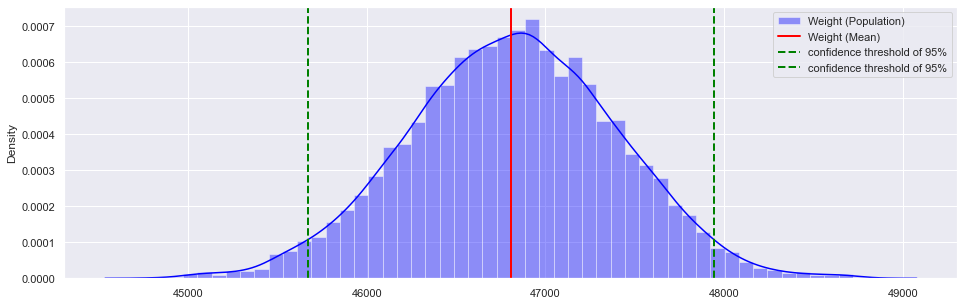

In [139]:
plt.figure(figsize=(16,5))
sns.distplot(image_pop, label='Weight (Population)', color='blue')
plt.axvline(image["monthly_spend"].mean(), color='red', linewidth=2, label='Weight (Mean)')

plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.legend()

Berdasarkan hasil analisis dengan confidence interval maka diperkirakan dengan 95% keyakinan bahwa biaya per bulan yang dibutuhkan untuk memasang iklan dengan jenis image pada Google Ads berkisar antara \$ 45671.0   hingga  \$ 47943.0 

## Bab 6 Pengambilan Kesimpulan

Berdasarkan hasil eksplorasi data ditemukan :
- Terdapat tiga jenis iklan yang dipasang di Google Ads yaitu **text**, **image** dan **video**. Dari ketiga jenis iklan tersebut yang paling sering dipasang adalah jenis iklan **video**
- Jenis iklan dengan rata-rata impression paling banyak adalah iklan dengan jenis **image**.
- Jenis iklan dengan rata-rata lama mendapatkan impressions terbanyak adalah iklan dengan jenis **image**.
- Jenis iklan dengan biaya rata-rata paling murah adalah iklan dengan jenis **image**.
- Diketahui terdapat dua jenis iklan yang mendapatkan impression terbanyak adalah iklan jenis **video** dan **image**. Namun terdapat iklan dengan jenis **image** yang memerlukan biaya lebih murah dari pada iklan dengan jenis **video**.

Dari hasil eksplorasi data tersebut dapat disimpulkan bahwa memasang iklan dengan tipe image adalah strategi kampanye yang paling baik. Meskipun demikian diperlukan analisis lebih lanjut untuk dapat memberikan usulan yang lebih matang.

Berdasarkan hasil analisis statistik deskriptif :
- Rata-rata iklan di Google Ads mendapatkan impression selama 17 hari
- Nilai tengah iklan di Google Ads mendapatkan impression adalah 5 hari
- Lama iklan paling sering mendapatkan impression adalah selama 1 hari
- Rata-rata penegeluaran per bulan yang diperlukan untuk memasang iklan di Google Ads adalah $ 510406.8
- Nilai tengah pengeluaran per bulan yang diperlukan untuk memasang iklan di Google Ads adalah $ 2400.0
- Pengeluaran per bulan yang paling sering diperlukan untuk memasang iklan di Google Ads adalah $ 400.0
- Rata-rata impression yang didapat iklan yang di pasang di Google Ads adalah sebesar 173265 kali
- Nilai tengah jumlah impression yang didapat iklan yang di pasang di Google Ads adalah sebesar 500 kali
- Impression paling sering yang didapatkan iklan yang dipasang di Google Ads adalah sebesar 500 kali
- Pengiklan yang paling sering memasang iklan adalah TURNING POINT USA, NFP
- Jenis iklan yang paling sering dipasang di Google Ads adalah video
- Rentang impression yang paling sering didapat di Google Ads adalah 0-1000 kali

Dari hasil analisis statistik deskriptif diketahui bahwa rata-rata lama iklan mendapatkan impression untuk iklan dengan jenis image yaitu 35 hari. Sedangkan rata-rata keseluruhan lama iklan mendapat impression adalah 17 hari. Oleh karena itu dapat disimpulkan bahwa rata-rata lama iklan jenis image lebih besar dari rata-rata iklan keseluruhan. Selain itu 
rata-rata biaya yang diperlukan untuk memasang iklan dengan jenis image sebesar \$ 46807.0 juga lebih kecil dari rata-rata biaya pemasangan iklan keseluruhan yaitu \$ 510406.8. Terakhir begitu rata-rata impression untuk iklan jenis image sebesar 1353905 kali juga lebih besar dari rata-rata impression iklan keseluruhan yaitu sebesar 173265 kali.

Pada hasil uji hipotesis untuk membandingkan dua iklan dengan biaya yang paling murah yaitu iklan dengan jenis image dan juga jenis video tidak ditemukan perbedaan yang signifikan sehingga dengan mempertimbangankan temuan analisis yang sudah dilakukan sebelumnya, maka strategi kampanye yang paling efektif di Google Ads adalah dengan menggunakan iklan dengan jenis image. Selain itu dari hasil analisis yang sudah dilakukan peneliti menemukan estimasi biaya per bulan yang diperlukan untuk memasang data dengan jenis image berkisar antara \$ 45671.0   hingga  \$ 47943.0